In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
df_total_sales = pd.read_csv('C:/Users/Admin/Python exercise/Final assignment/Data/kenvue_data/Total Sales - UTSC Lecture.csv')
df_customer_inventory = pd.read_csv('C:/Users/Admin/Python exercise/Final assignment/Data/kenvue_data/Customer DC Inventory - UTSC Lecture.csv',
                                    header=[0,1])
df_factory_POS = pd.read_csv('C:/Users/Admin/Python exercise/Final assignment/Data/kenvue_data/Factory POS $ - UTSC Lecture.csv',
                             header=[0,1])
df_ecomm_POS = pd.read_csv ('C:/Users/Admin/Python exercise/Final assignment/Data/kenvue_data/Total Ecomm POS (Factory $) - UTSC Lecture.csv', 
                            header=[0,1])
df_total_trade = pd.read_csv ('C:/Users/Admin/Python exercise/Final assignment/Data/kenvue_data/Total Trade Spend.csv') 

In [3]:
#Cleaning df_total_sales Data frame
df_total_sales

,Fiscal Year,Fiscal Week,Need State 1,Need State 2,Need State 3,Need State 4,Need State 5
0,2021,1,132818.25,251858.25,209473.50,373678.50,246819.75
1,2021,2,395708.25,510633.75,683112.00,597628.50,465099.75
2,2021,3,207779.25,525278.25,627825.75,300238.50,548790.75
3,2021,4,323169.75,480166.50,318566.25,319001.25,553418.25
4,2021,5,71536.50,304409.25,439665.00,433508.25,323542.50
...,...,...,...,...,...,...,...
144,2023,41,550887.00,221686.50,121078.50,240855.75,600489.00
145,2023,42,905002.50,523613.25,377325.75,529374.75,1061086.50
146,2023,43,196313.25,17168.25,19847.25,22635.00,73047.00
147,2023,46,0.00,0.00,0.00,0.00,0.00


In [4]:
# Cleaning df_total_trade Data frame
df_total_trade

,Fiscal Year,Fiscal Week,Need State 1,Need State 2,Need State 3,Need State 4,Need State 5
0,2021,1,5552,14264,1563,18716,5075
1,2021,2,18939,12329,8658,8069,11307
2,2021,3,11346,6351,4032,3128,6585
3,2021,4,4801,14715,13935,9324,6835
4,2021,5,17470,16092,13601,5460,11902
...,...,...,...,...,...,...,...
144,2023,41,2918,2361,15546,7217,9652
145,2023,42,10743,15952,3993,6707,17320
146,2023,43,7823,19451,12462,1217,4638
147,2023,46,19575,14362,12145,16973,575


In [5]:
# Cleaning Customer DC Inventor
df_customer_inventory.columns
df_customer_inventory = df_customer_inventory.set_index([('Fiscal Year  /  Fiscal Week','Need State'),
                                                         ('Unnamed: 1_level_0', 'Unnamed: 1_level_1')])
df_customer_inventory = df_customer_inventory.T
df_customer_inventory = df_customer_inventory.stack(0)
df_customer_inventory = df_customer_inventory.reset_index()
df_customer_inventory = df_customer_inventory.rename_axis(None, axis=1)
df_customer_inventory = df_customer_inventory.rename(columns={df_customer_inventory.columns[0]: 'Fiscal Year', 
                                                              df_customer_inventory.columns[1]:'Fiscal Week', 
                                                              df_customer_inventory.columns[2]: 'Need States'})
# Type cast Fiscal Year and Fiscal Week to int64
df_customer_inventory = df_customer_inventory.astype({'Fiscal Year': 'int64', 'Fiscal Week': 'int64'})

df_customer_inventory

,Fiscal Year,Fiscal Week,Need States,Dc Amount,Store Amt On Hand
0,2021,1,Need State 1,1445929.50,3667244.25
1,2021,1,Need State 2,2405549.25,2784957.75
2,2021,1,Need State 3,1618319.25,3838764.00
3,2021,1,Need State 4,1271980.50,1893348.00
4,2021,1,Need State 5,601577.25,1055337.75
...,...,...,...,...,...
931,2023,52,Need State 2,0.00,0.00
932,2023,52,Need State 3,0.00,0.00
933,2023,52,Need State 4,0.00,0.00
934,2023,52,Need State 5,0.00,0.00


In [6]:
"""Cleaning ecomm_POS data frame: Stack all Fiscal Week Column under one new column "Week" 
(i.e switching from wide to long dataframe) AND Spread the data out again by Need State 
(i.e switching from long to wide dataframe)
"""
# Group the first 2 row of df_ecomm_Pos to make the column header
df_ecomm_POS.columns = df_ecomm_POS.columns.map('_'.join)

#Create an additional col to act as the table temporary index when switching from wide to long dataframe
row_id = []
for i in range (0,18):
    row_id.append(i)
df_ecomm_POS['Row_id'] = row_id

# Using "Row_id" AND "Unnamed: 1_level_0_Fiscal Year" AND "Unnamed: 0_level_0_Need State" as the table index.
# Stack all observations of any column that have regex "Fiscal Weel_\w+" in the header under the new column, called "Fiscal Week"
df_ecomm_POS = pd.wide_to_long(df_ecomm_POS, stubnames='Fiscal Week', i = ['Row_id', 'Unnamed: 1_level_0_Fiscal Year',
                                                                           'Unnamed: 0_level_0_Need State'],
                                                        j ='Week', sep='_', suffix=r'\w+')

# Reset index
df_ecomm_POS = df_ecomm_POS.reset_index()
# Drop the temporary index as i have been changed during the switch
df_ecomm_POS = df_ecomm_POS.drop('Row_id',axis=1)

# Use the 'Unnamed: 1_level_0_Fiscal Year' AND 'Week' columns as Index to divide the "Fiscal Week" column
# to separated category by Need State
df_ecomm_POS = pd.pivot(df_ecomm_POS,index=['Unnamed: 1_level_0_Fiscal Year','Week'],
                      columns=['Unnamed: 0_level_0_Need State'], values='Fiscal Week')

# Reset index
df_ecomm_POS = df_ecomm_POS.reset_index()

# Rename the column
df_ecomm_POS = df_ecomm_POS.rename_axis(None, axis = 1)
df_ecomm_POS = df_ecomm_POS.rename(columns={df_ecomm_POS.columns[0]:'Fiscal Year', df_ecomm_POS.columns[1]:'Fiscal Week'})

# Display the final result
df_ecomm_POS

,Fiscal Year,Fiscal Week,Need State 1,Need State 2,Need State 3,Need State 4,Need State 5,Need State 6
0,2021,1,3684.75,11283.00,11958.75,14755.50,448.50,6929.25
1,2021,2,3426.75,12698.25,11279.25,16803.00,285.75,6226.50
2,2021,3,4221.75,18210.00,9659.25,16849.50,276.00,7128.75
3,2021,4,2959.50,12725.25,11369.25,14108.25,237.75,6423.75
4,2021,5,3402.75,19290.75,8376.00,20616.00,433.50,6801.00
...,...,...,...,...,...,...,...,...
151,2023,48,0.00,0.00,0.00,0.00,0.00,0.00
152,2023,49,0.00,0.00,0.00,0.00,0.00,0.00
153,2023,50,0.00,0.00,0.00,0.00,0.00,0.00
154,2023,51,0.00,0.00,0.00,0.00,0.00,0.00


In [7]:
"""Cleaning ecomm_POS data frame: Stack all Fiscal Year Column under one new column "Year" 
(i.e switching from wide to long dataframe) AND Spread the data out again by Need State 
(i.e switching from long to wide dataframe)
"""
# Join the first 2 row to form the column's header
df_factory_POS.columns = df_factory_POS.columns.map('_'.join)

# Create and add a temporary index column
row_id = []
for i in range (0,312):
    row_id.append(i)
df_factory_POS['Row_id'] = row_id

# Use "Row_id" AND 'Unnamed: 0_level_0_Need State' AND 'Unnamed: 1_level_0_Fiscal Week' as indexes to stack
# observations under columns with regex "Fiscal Year_\w+" under new colum "Year"
df_factory_POS = pd.wide_to_long(df_factory_POS, stubnames='Fiscal Year', i = ['Row_id', 'Unnamed: 0_level_0_Need State', 
                                                                           'Unnamed: 1_level_0_Fiscal Week'],
                                                        j ='Year', sep='_', suffix=r'\w+')
# Reset index
df_factory_POS = df_factory_POS.reset_index()

# Remove the temporary index column "Row_id"
df_factory_POS = df_factory_POS.drop('Row_id',axis=1)

# Use the 'Unnamed: 1_level_0_Fiscal Week' AND 'Year' columns as Index to divide the "Fiscal Year" column
# to separated category by Need State
df_factory_POS = pd.pivot(df_factory_POS, index=['Unnamed: 1_level_0_Fiscal Week','Year'],
                      columns=['Unnamed: 0_level_0_Need State'], values='Fiscal Year')
df_factory_POS = df_factory_POS.reset_index()

# Rename column
df_factory_POS = df_factory_POS.rename_axis(None, axis = 1)
df_factory_POS = df_factory_POS.rename(columns = {df_factory_POS.columns[0]: 'Fiscal Week', 
                                                  df_factory_POS.columns[1]:'Fiscal Year'})

# Reange and sort columns to follow other file format
Columns_titles = ['Fiscal Year','Fiscal Week','Need State 1','Need State 2',
                 'Need State 3', 'Need State 4', 'Need State 5','Need State 6']
df_factory_POS=df_factory_POS.reindex(columns=Columns_titles)
df_factory_POS = df_factory_POS.sort_values(by=['Fiscal Year','Fiscal Week'])

# Show final result
df_factory_POS

,Fiscal Year,Fiscal Week,Need State 1,Need State 2,Need State 3,Need State 4,Need State 5,Need State 6
0,2021,1,317435.25,410931.0,355992.75,451255.50,15795.00,457623.75
3,2021,2,309234.75,447469.5,432966.00,472152.75,11154.75,452605.50
6,2021,3,331149.00,471435.0,325530.00,465115.50,10549.50,519924.75
9,2021,4,291885.00,427167.0,409405.50,401831.25,10443.00,452333.25
12,2021,5,308238.00,529465.5,313095.75,501825.75,12430.50,498557.25
...,...,...,...,...,...,...,...,...
143,2023,48,0.00,0.0,0.00,0.00,0.00,0.00
146,2023,49,0.00,0.0,0.00,0.00,0.00,0.00
149,2023,50,0.00,0.0,0.00,0.00,0.00,0.00
152,2023,51,0.00,0.0,0.00,0.00,0.00,0.00


In [8]:
"""Merging df_total_trade, df_total sales, df_ecomm_POS, df_factory_POS"""

# Restructure original dataframe to have different name for each column

df_merging_trade = df_total_trade.rename(columns={df_total_trade.columns[2]:'Trade_1', df_total_trade.columns[3]:'Trade_2', 
                                                  df_total_trade.columns[4]:'Trade_3', df_total_trade.columns[5]: 'Trade_4',
                                                 df_total_trade.columns[6]:'Trade_5'})
df_merging_sales = df_total_sales.rename(columns={df_total_sales.columns[2]:'Sale_1', df_total_sales.columns[3]:'Sale_2', 
                                                  df_total_sales.columns[4]:'Sale_3', df_total_sales.columns[5]: 'Sale_4',
                                                 df_total_sales.columns[6]:'Sale_5'})

df_merging_ecomm_POS = df_ecomm_POS.rename(columns={df_ecomm_POS.columns[2]: 'ecomm_1', df_ecomm_POS.columns[3]: 'ecomm_2',
                                                    df_ecomm_POS.columns[4]: 'ecomm_3', df_ecomm_POS.columns[5]: 'ecomm_4',
                                                    df_ecomm_POS.columns[6]: 'ecomm_5', df_ecomm_POS.columns[7]:'ecomm_6'})
df_merging_factory_POS = df_factory_POS.rename(columns={df_factory_POS.columns[2]: 'factory_1',
                                                          df_factory_POS.columns[3]: 'factory_2',
                                                          df_factory_POS.columns[4]: 'factory_3',
                                                          df_factory_POS.columns[5]: 'factory_4',
                                                          df_factory_POS.columns[6]: 'factory_5',
                                                          df_factory_POS.columns[7]: 'factory_6'})


df_master = df_merging_sales.merge(df_merging_trade, on=['Fiscal Year', 'Fiscal Week'], how='inner')
df_master = df_master.merge(df_merging_ecomm_POS, on=['Fiscal Year', 'Fiscal Week'], how='inner')
df_master = df_master.merge(df_merging_factory_POS, on=['Fiscal Year', 'Fiscal Week'], how='inner')
df_master

,Fiscal Year,Fiscal Week,Sale_1,Sale_2,Sale_3,Sale_4,Sale_5,Trade_1,Trade_2,Trade_3,...,ecomm_3,ecomm_4,ecomm_5,ecomm_6,factory_1,factory_2,factory_3,factory_4,factory_5,factory_6
0,2021,1,132818.25,251858.25,209473.50,373678.50,246819.75,5552,14264,1563,...,11958.75,14755.50,448.50,6929.25,317435.25,410931.00,355992.75,451255.50,15795.00,457623.75
1,2021,2,395708.25,510633.75,683112.00,597628.50,465099.75,18939,12329,8658,...,11279.25,16803.00,285.75,6226.50,309234.75,447469.50,432966.00,472152.75,11154.75,452605.50
2,2021,3,207779.25,525278.25,627825.75,300238.50,548790.75,11346,6351,4032,...,9659.25,16849.50,276.00,7128.75,331149.00,471435.00,325530.00,465115.50,10549.50,519924.75
3,2021,4,323169.75,480166.50,318566.25,319001.25,553418.25,4801,14715,13935,...,11369.25,14108.25,237.75,6423.75,291885.00,427167.00,409405.50,401831.25,10443.00,452333.25
4,2021,5,71536.50,304409.25,439665.00,433508.25,323542.50,17470,16092,13601,...,8376.00,20616.00,433.50,6801.00,308238.00,529465.50,313095.75,501825.75,12430.50,498557.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,2023,41,550887.00,221686.50,121078.50,240855.75,600489.00,2918,2361,15546,...,5431.50,8591.25,928.50,6583.50,338671.50,351225.75,271016.25,418831.50,36111.00,527268.00
145,2023,42,905002.50,523613.25,377325.75,529374.75,1061086.50,10743,15952,3993,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
146,2023,43,196313.25,17168.25,19847.25,22635.00,73047.00,7823,19451,12462,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
147,2023,46,0.00,0.00,0.00,0.00,0.00,19575,14362,12145,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [9]:
# Add seasonality category into the data frame
df_customer_inventory['Quarter'] = df_customer_inventory['Fiscal Week'].apply (lambda x: 'Q1' if (x>=1) and (x<= 13) else
                                                     ('Q2' if (x>=14) and (x<=26) else
                                                     ('Q3' if (x>=27) and (x<=39) else 'Q4')))
df_master['Quarter'] = df_master['Fiscal Week'].apply (lambda x: 'Q1' if (x>=1) and (x<= 13) else
                                                     ('Q2' if (x>=14) and (x<=26) else
                                                     ('Q3' if (x>=27) and (x<=39) else 'Q4')))
df_master

,Fiscal Year,Fiscal Week,Sale_1,Sale_2,Sale_3,Sale_4,Sale_5,Trade_1,Trade_2,Trade_3,...,ecomm_4,ecomm_5,ecomm_6,factory_1,factory_2,factory_3,factory_4,factory_5,factory_6,Quarter
0,2021,1,132818.25,251858.25,209473.50,373678.50,246819.75,5552,14264,1563,...,14755.50,448.50,6929.25,317435.25,410931.00,355992.75,451255.50,15795.00,457623.75,Q1
1,2021,2,395708.25,510633.75,683112.00,597628.50,465099.75,18939,12329,8658,...,16803.00,285.75,6226.50,309234.75,447469.50,432966.00,472152.75,11154.75,452605.50,Q1
2,2021,3,207779.25,525278.25,627825.75,300238.50,548790.75,11346,6351,4032,...,16849.50,276.00,7128.75,331149.00,471435.00,325530.00,465115.50,10549.50,519924.75,Q1
3,2021,4,323169.75,480166.50,318566.25,319001.25,553418.25,4801,14715,13935,...,14108.25,237.75,6423.75,291885.00,427167.00,409405.50,401831.25,10443.00,452333.25,Q1
4,2021,5,71536.50,304409.25,439665.00,433508.25,323542.50,17470,16092,13601,...,20616.00,433.50,6801.00,308238.00,529465.50,313095.75,501825.75,12430.50,498557.25,Q1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,2023,41,550887.00,221686.50,121078.50,240855.75,600489.00,2918,2361,15546,...,8591.25,928.50,6583.50,338671.50,351225.75,271016.25,418831.50,36111.00,527268.00,Q4
145,2023,42,905002.50,523613.25,377325.75,529374.75,1061086.50,10743,15952,3993,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Q4
146,2023,43,196313.25,17168.25,19847.25,22635.00,73047.00,7823,19451,12462,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Q4
147,2023,46,0.00,0.00,0.00,0.00,0.00,19575,14362,12145,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Q4


In [10]:
# Export data frame to csv file for data visualization
# remove the # sign to execute the command

# df_customer_inventory.to_csv('C:/Users/Admin/Python exercise/Final assignment/Data/customer_inventory')

# df_master.to_csv('C:/Users/Admin/Python exercise/Final assignment/Data/master data.csv')

In [11]:
# Total sales
groupedby_fiscalyear = df_master.groupby(['Fiscal Year'])[['Sale_1', 'Sale_2', 'Sale_3','Sale_4','Sale_5']].sum().reset_index()
groupedby_fiscalyear.head()

,Fiscal Year,Sale_1,Sale_2,Sale_3,Sale_4,Sale_5
0,2021,29739995.25,19568683.50,19101012.00,22267800.0,26985564.75
1,2022,31246989.75,20814321.75,19183299.75,21826323.0,29768792.25
2,2023,25045303.50,17546953.50,13766230.50,17122915.5,24757329.00


In [12]:
YOY_NeedState_Sales = groupedby_fiscalyear.melt(id_vars='Fiscal Year', var_name='Sale', value_name='Value')

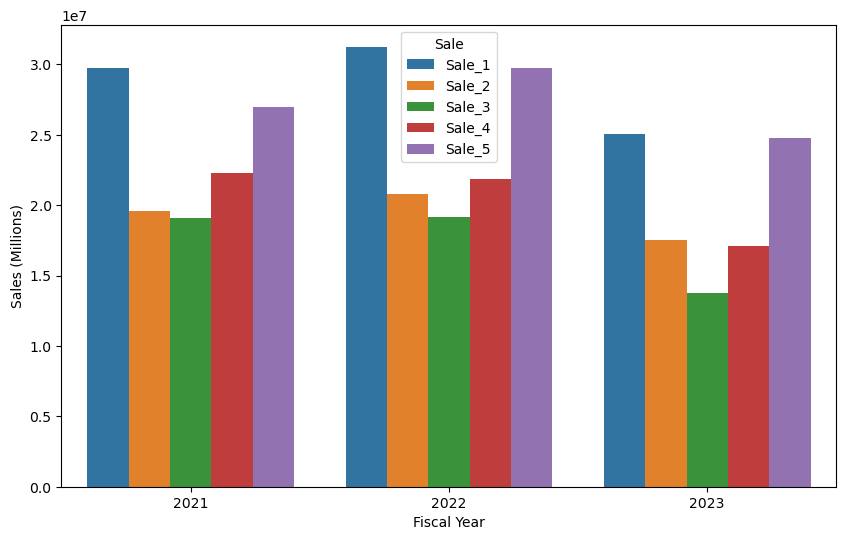

In [13]:
plt.figure(figsize=(10,6))
sns.barplot(x='Fiscal Year', y='Value', hue='Sale', data=YOY_NeedState_Sales)
plt.xlabel('Fiscal Year')
plt.ylabel('Sales (Millions)')
plt.show()

In [14]:
year_2021 = df_master[(df_master['Fiscal Year'] == 2021)]
year_2022 = df_master[(df_master['Fiscal Year'] == 2022)]
year_2023 = df_master[(df_master['Fiscal Year'] == 2023)]

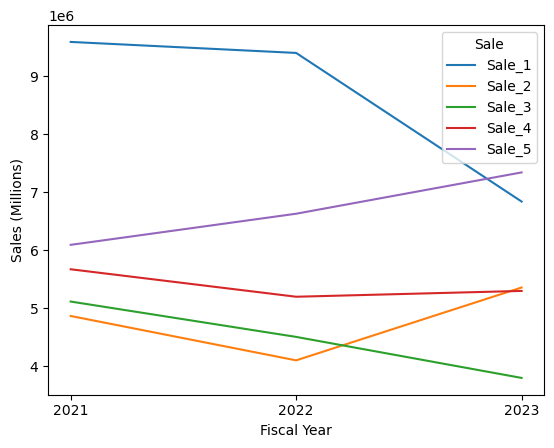

In [15]:
# Filtering Q1 Total sales 2021-2023
Q1_TotalSale = df_master[(df_master['Quarter'] == 'Q1')]
Q1_SaleByYear = Q1_TotalSale.groupby(['Fiscal Year'])[['Sale_1', 'Sale_2', 'Sale_3','Sale_4','Sale_5']].sum().reset_index()

# Melting from wide data to long data to pass to line chart
Q1_SaleByYear = Q1_SaleByYear.melt(id_vars='Fiscal Year', var_name='Sale', value_name='Value')

#Create a line Chart
sns.lineplot(x='Fiscal Year', y='Value', hue='Sale', data=Q1_SaleByYear)
plt.xlabel('Fiscal Year')
plt.ylabel('Sales (Millions)')

#Set x-axis to display only unique values
unique_year = Q1_SaleByYear['Fiscal Year'].unique()
plt.xticks(unique_year)
plt.show()

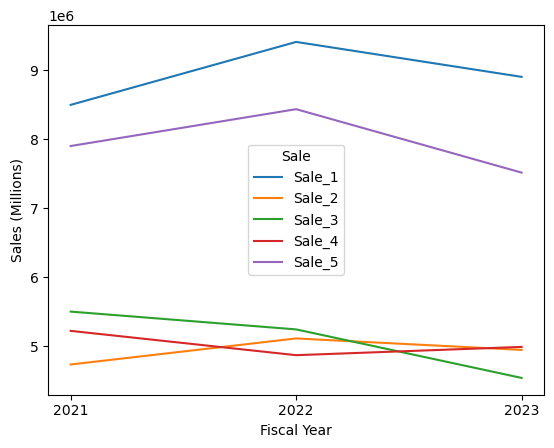

In [16]:
# Filtering Q2 Total sales 2021-2023
Q2_TotalSale = df_master[(df_master['Quarter'] == 'Q2')]
Q2_SaleByYear = Q2_TotalSale.groupby(['Fiscal Year'])[['Sale_1', 'Sale_2', 'Sale_3','Sale_4','Sale_5']].sum().reset_index()

# Melting from wide data to long data to pass to line chart
Q2_SaleByYear = Q2_SaleByYear.melt(id_vars='Fiscal Year', var_name='Sale', value_name='Value')

#Create a line Chart
sns.lineplot(x='Fiscal Year', y='Value', hue='Sale', data=Q2_SaleByYear)
plt.xlabel('Fiscal Year')
plt.ylabel('Sales (Millions)')

#Set x-axis to display only unique values
unique_year = Q2_SaleByYear['Fiscal Year'].unique()
plt.xticks(unique_year)
plt.show()

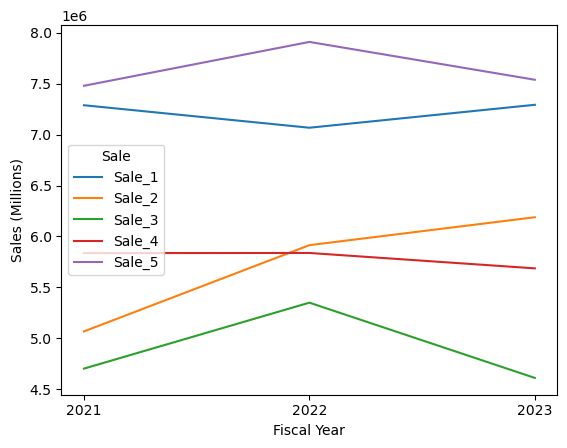

In [17]:
# Filtering Q3 Total sales 2021-2023
Q3_TotalSale = df_master[(df_master['Quarter'] == 'Q3')]
Q3_SaleByYear = Q3_TotalSale.groupby(['Fiscal Year'])[['Sale_1', 'Sale_2', 'Sale_3','Sale_4','Sale_5']].sum().reset_index()

# Melting from wide data to long data to pass to line chart
Q3_SaleByYear = Q3_SaleByYear.melt(id_vars='Fiscal Year', var_name='Sale', value_name='Value')

#Create a line Chart
sns.lineplot(x='Fiscal Year', y='Value', hue='Sale', data=Q3_SaleByYear)
plt.xlabel('Fiscal Year')
plt.ylabel('Sales (Millions)')

#Set x-axis to display only unique values
unique_year = Q3_SaleByYear['Fiscal Year'].unique()
plt.xticks(unique_year)
plt.show()

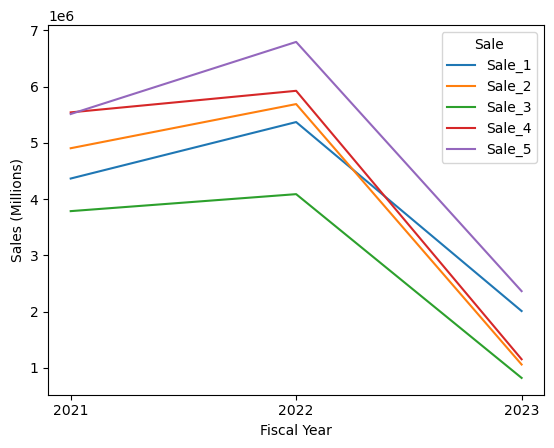

In [18]:
# Filtering Q4 Total sales 2021-2023
Q4_TotalSale = df_master[(df_master['Quarter'] == 'Q4')]
Q4_SaleByYear = Q4_TotalSale.groupby(['Fiscal Year'])[['Sale_1', 'Sale_2', 'Sale_3','Sale_4','Sale_5']].sum().reset_index()

# Melting from wide data to long data to pass to line chart
Q4_SaleByYear = Q4_SaleByYear.melt(id_vars='Fiscal Year', var_name='Sale', value_name='Value')

#Create a line Chart
sns.lineplot(x='Fiscal Year', y='Value', hue='Sale', data=Q4_SaleByYear)
plt.xlabel('Fiscal Year')
plt.ylabel('Sales (Millions)')

#Set x-axis to display only unique values
unique_year = Q4_SaleByYear['Fiscal Year'].unique()
plt.xticks(unique_year)
plt.show()

  Quarter      Sale_1     Sale_2      Sale_3      Sale_4      Sale_5
0      Q1  6837707.25  5357076.0  3799672.50  5298235.50  7339703.25
1      Q2  8905632.75  4942870.5  4536291.75  4986486.75  7515980.25
2      Q3  7292786.25  6188500.5  4610170.50  5686286.25  7538699.25
3      Q4  2009177.25  1058506.5   820095.75  1151907.00  2362946.25


Text(0, 0.5, 'Sales (Millions)')

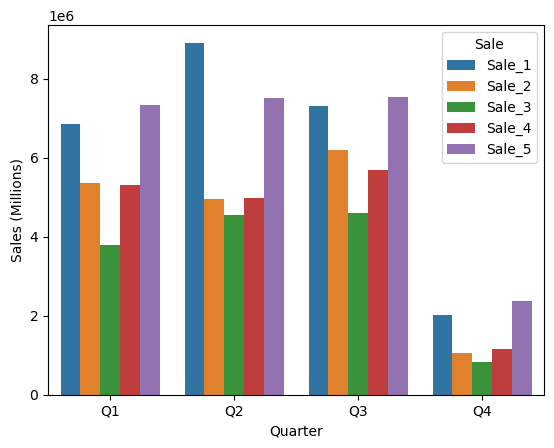

In [19]:
# 2023 Quarterly Sales

SaleByQuarter_23 = year_2023.groupby(['Quarter'])[['Sale_1', 'Sale_2', 'Sale_3','Sale_4','Sale_5']].sum().reset_index()
print (SaleByQuarter_23)

# Melting from wide data to long data to pass to bar chart
SaleByQuarter_23 = SaleByQuarter_23.melt(id_vars='Quarter', var_name='Sale', value_name='Value')

#Create a Bar Chart
sns.barplot(x='Quarter', y='Value', hue='Sale', data=SaleByQuarter_23)
plt.xlabel('Quarter')
plt.ylabel('Sales (Millions)')

  Quarter   factory_1   factory_2   factory_3   factory_4   factory_5
0      Q1  4544020.50  5259360.00  4350422.25  5423714.25  1130615.25
1      Q2  8925495.75  5078697.75  4059625.50  5238693.75  4435177.50
2      Q3  6968241.00  4813856.25  4077033.00  5466468.75  2702507.25
3      Q4   795099.75   742587.75   602630.25   836418.75    93903.75


Text(0, 0.5, 'Factory POS$ (Millions)')

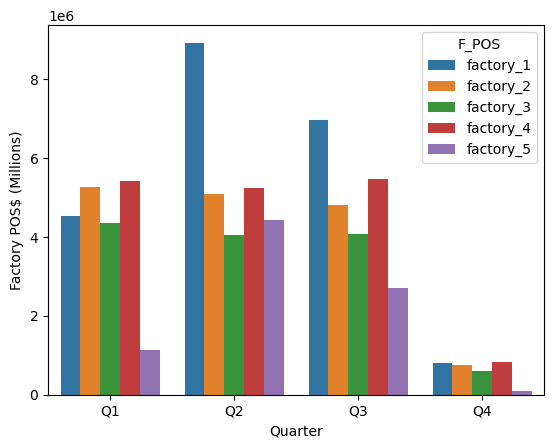

In [20]:
# 2023 Factory POS$

FPOS_ByQuarter_23 = year_2023.groupby(['Quarter'])[['factory_1', 'factory_2', 'factory_3','factory_4',
                                                            'factory_5']].sum().reset_index()
print (FPOS_ByQuarter_23)

# Melting from wide data to long data to pass to bar chart
FPOS_ByQuarter_23 = FPOS_ByQuarter_23.melt(id_vars='Quarter', var_name='F_POS', value_name='Value')

#Create a Bar Chart
sns.barplot(x='Quarter', y='Value', hue='F_POS', data=FPOS_ByQuarter_23)
plt.xlabel('Quarter')
plt.ylabel('Factory POS$ (Millions)')

  Quarter   ecomm_1    ecomm_2   ecomm_3    ecomm_4   ecomm_5
0      Q1  36193.50  111813.75  82091.25  120267.75  25725.75
1      Q2  66086.25  102303.75  86061.00  103117.50  87075.00
2      Q3  47086.50   86160.00  81193.50  102459.00  42566.25
3      Q4   6107.25   13002.00  12277.50   15979.50   1626.75


Text(0, 0.5, 'Ecommerce POS$')

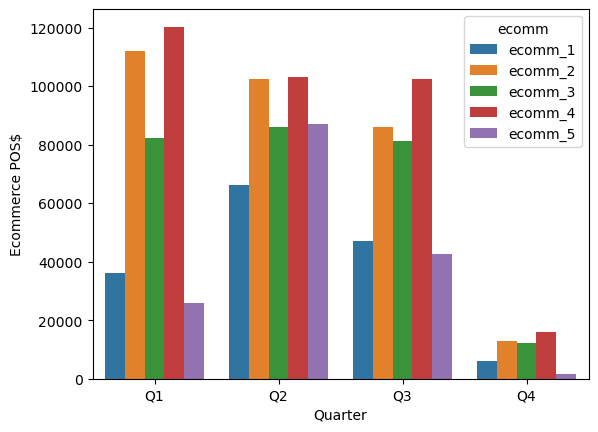

In [21]:
# 2023 Ecomm POS$

EPOS_ByQuarter_23 = year_2023.groupby(['Quarter'])[['ecomm_1', 'ecomm_2', 'ecomm_3','ecomm_4','ecomm_5']].sum().reset_index()
print (EPOS_ByQuarter_23)

# Melting from wide data to long data to pass to bar chart
EPOS_ByQuarter_23 = EPOS_ByQuarter_23.melt(id_vars='Quarter', var_name='ecomm', value_name='Value')

#Create a Bar Chart
sns.barplot(x='Quarter', y='Value', hue='ecomm', data=EPOS_ByQuarter_23)
plt.xlabel('Quarter')
plt.ylabel('Ecommerce POS$')

  Quarter      Sale_1      Sale_2      Sale_3      Sale_4      Sale_5
0      Q1  9397800.00  4102264.50  4506237.75  5198001.00  6628129.50
1      Q2  9412632.75  5109297.00  5240413.50  4866287.25  8436606.75
2      Q3  7067613.75  5914222.50  5349341.25  5837455.50  7910341.50
3      Q4  5368943.25  5688537.75  4087307.25  5924579.25  6793714.50


Text(0, 0.5, 'Sales (Millions)')

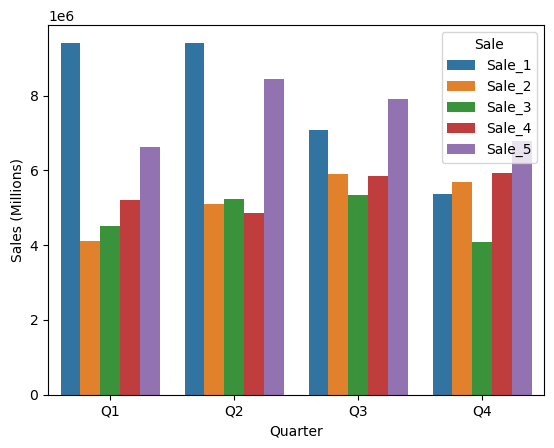

In [22]:
# 2022 Quarterly Sales

SaleByQuarter_22 = year_2022.groupby(['Quarter'])[['Sale_1', 'Sale_2', 'Sale_3','Sale_4','Sale_5']].sum().reset_index()
print (SaleByQuarter_22)

# Melting from wide data to long data to pass to bar chart
SaleByQuarter_22 = SaleByQuarter_22.melt(id_vars='Quarter', var_name='Sale', value_name='Value')

#Create a Bar Chart
sns.barplot(x='Quarter', y='Value', hue='Sale', data=SaleByQuarter_22)
plt.xlabel('Quarter')
plt.ylabel('Sales (Millions)')

  Quarter   factory_1   factory_2   factory_3   factory_4   factory_5
0      Q1  4799439.75  4134833.25  4159978.50  5420123.25   526445.25
1      Q2  9830857.50  4985988.75  4483389.75  5269843.50  3282240.00
2      Q3  8265961.50  4682857.50  4826750.25  5475267.00  2339682.00
3      Q4  4855283.25  6061299.75  4503885.75  5634651.00   585233.25


Text(0, 0.5, 'Factory POS$ (Millions)')

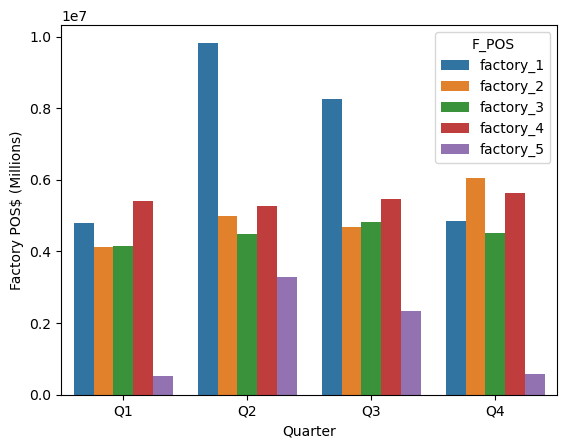

In [23]:
# 2022 Factory POS$

FPOS_ByQuarter_22 = year_2022.groupby(['Quarter'])[['factory_1', 'factory_2', 'factory_3','factory_4',
                                                            'factory_5']].sum().reset_index()
print (FPOS_ByQuarter_22)

# Melting from wide data to long data to pass to bar chart
FPOS_ByQuarter_22 = FPOS_ByQuarter_22.melt(id_vars='Quarter', var_name='F_POS', value_name='Value')

#Create a Bar Chart
sns.barplot(x='Quarter', y='Value', hue='F_POS', data=FPOS_ByQuarter_22)
plt.xlabel('Quarter')
plt.ylabel('Factory POS$ (Millions)')

  Quarter   ecomm_1    ecomm_2   ecomm_3    ecomm_4   ecomm_5
0      Q1  47310.75  110471.25  85953.00  148787.25  11556.75
1      Q2  78322.50   98592.75  78243.00  115212.75  60504.00
2      Q3  59007.00   79911.75  80420.25  106411.50  36802.50
3      Q4  34893.00  131859.00  91910.25  113766.75   9614.25


Text(0, 0.5, 'Ecommerce POS$')

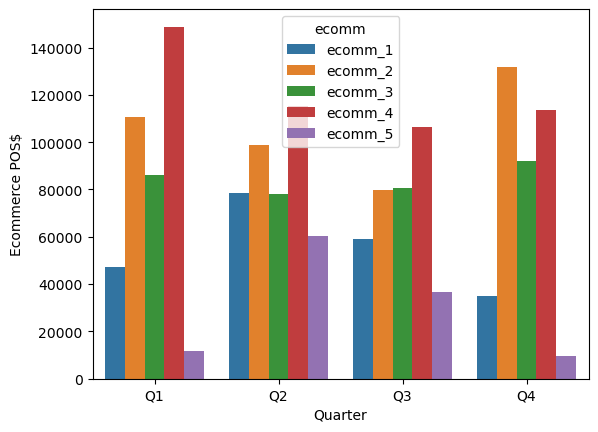

In [24]:
# 2022 Ecomm POS$

EPOS_ByQuarter_22 = year_2022.groupby(['Quarter'])[['ecomm_1', 'ecomm_2', 'ecomm_3','ecomm_4','ecomm_5']].sum().reset_index()
print (EPOS_ByQuarter_22)

# Melting from wide data to long data to pass to bar chart
EPOS_ByQuarter_22 = EPOS_ByQuarter_22.melt(id_vars='Quarter', var_name='ecomm', value_name='Value')

#Create a Bar Chart
sns.barplot(x='Quarter', y='Value', hue='ecomm', data=EPOS_ByQuarter_22)
plt.xlabel('Quarter')
plt.ylabel('Ecommerce POS$')

  Quarter      Sale_1      Sale_2      Sale_3      Sale_4      Sale_5
0      Q1  9587415.75  4866550.50  5115246.75  5671257.00  6092026.50
1      Q2  8499171.00  4731356.25  5498836.50  5219115.00  7902006.75
2      Q3  7288399.50  5066989.50  4701560.25  5836199.25  7479540.75
3      Q4  4365009.00  4903787.25  3785368.50  5541228.75  5511990.75


Text(0, 0.5, 'Sales (Millions)')

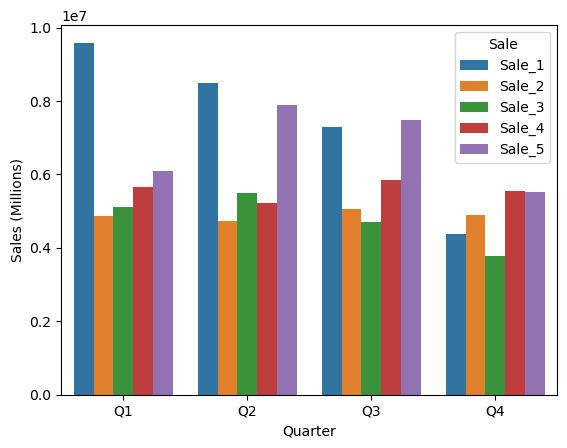

In [25]:
# 2021 Quarterly Sales

SaleByQuarter_21 = year_2021.groupby(['Quarter'])[['Sale_1', 'Sale_2', 'Sale_3','Sale_4','Sale_5']].sum().reset_index()
print (SaleByQuarter_21)

# Melting from wide data to long data to pass to bar chart
SaleByQuarter_21 = SaleByQuarter_21.melt(id_vars='Quarter', var_name='Sale', value_name='Value')

#Create a Bar Chart
sns.barplot(x='Quarter', y='Value', hue='Sale', data=SaleByQuarter_21)
plt.xlabel('Quarter')
plt.ylabel('Sales (Millions)')

  Quarter    factory_1   factory_2   factory_3   factory_4   factory_5
0      Q1   4549409.25  5757975.00  4881690.75  5663910.00   375762.00
1      Q2  10107842.25  5223582.00  5208875.25  5551569.75  4491363.00
2      Q3   7627799.25  4536140.25  4896007.50  5502497.25  1542857.25
3      Q4   4536329.25  5515140.00  4251091.50  5514554.25   252345.75


Text(0, 0.5, 'Factory POS$ (Millions)')

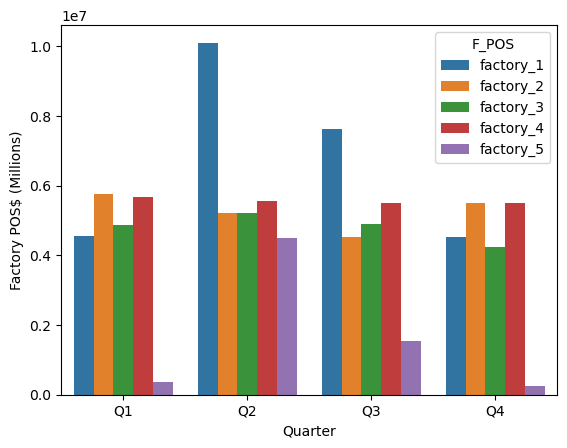

In [26]:
# 2021 Factory POS$

FPOS_ByQuarter_21 = year_2021.groupby(['Quarter'])[['factory_1', 'factory_2', 'factory_3','factory_4',
                                                            'factory_5']].sum().reset_index()
print (FPOS_ByQuarter_21)

# Melting from wide data to long data to pass to bar chart
FPOS_ByQuarter_21 = FPOS_ByQuarter_21.melt(id_vars='Quarter', var_name='F_POS', value_name='Value')

#Create a Bar Chart
sns.barplot(x='Quarter', y='Value', hue='F_POS', data=FPOS_ByQuarter_21)
plt.xlabel('Quarter')
plt.ylabel('Factory POS$ (Millions)')

  Quarter    ecomm_1    ecomm_2    ecomm_3    ecomm_4    ecomm_5
0      Q1   47021.25  173703.75  126625.50  187077.00    9105.00
1      Q2  108988.50  151437.00  134685.00  170375.25  168270.75
2      Q3   50512.50   88878.75   88024.50  123951.75   41789.25
3      Q4   33653.25  114977.25   87659.25  130518.00    3897.75


Text(0, 0.5, 'Ecommerce POS$')

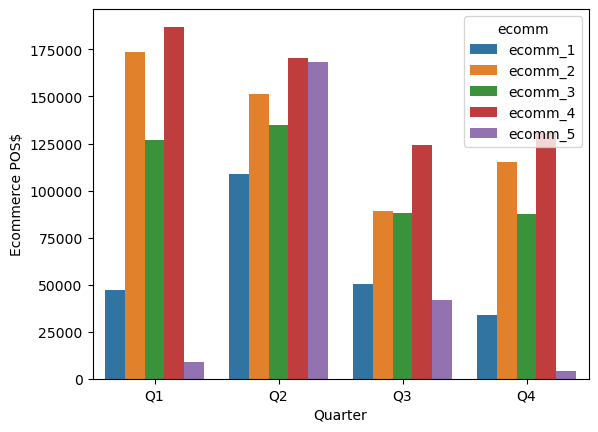

In [27]:
# 2021 Ecomm POS$

EPOS_ByQuarter_21 = year_2021.groupby(['Quarter'])[['ecomm_1', 'ecomm_2', 'ecomm_3','ecomm_4','ecomm_5']].sum().reset_index()
print (EPOS_ByQuarter_21)

# Melting from wide data to long data to pass to bar chart
EPOS_ByQuarter_21 = EPOS_ByQuarter_21.melt(id_vars='Quarter', var_name='ecomm', value_name='Value')

#Create a Bar Chart
sns.barplot(x='Quarter', y='Value', hue='ecomm', data=EPOS_ByQuarter_21)
plt.xlabel('Quarter')
plt.ylabel('Ecommerce POS$')

In [28]:
#Filter Need State 1 from master dataframe
df_NeedState_1 = df_master[['Fiscal Year', 'Quarter','Sale_1', 'factory_1','ecomm_1']]

#Group NeedState 1 by year and calculated the total sale each year
NeedState1_ByYear = df_NeedState_1.groupby(['Fiscal Year'])[['Sale_1', 'factory_1','ecomm_1']].sum().reset_index()
NeedState1_ByYear

,Fiscal Year,Sale_1,factory_1,ecomm_1
0,2021,29739995.25,26821380.0,240175.50
1,2022,31246989.75,27751542.0,219533.25
2,2023,25045303.50,21232857.0,155473.50


<function matplotlib.pyplot.show(close=None, block=None)>

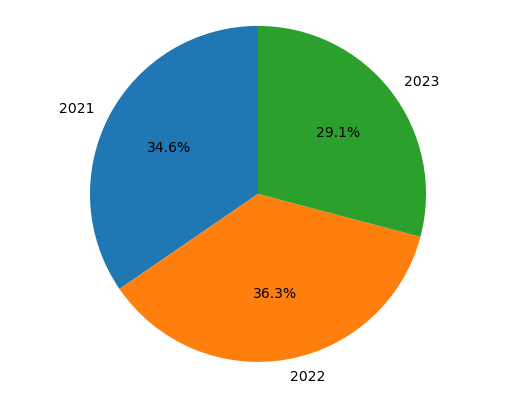

In [29]:
#NeedState1 Total Sale Composition

plt.pie(NeedState1_ByYear['Sale_1'], labels=NeedState1_ByYear['Fiscal Year'], autopct='%1.1f%%', startangle=90)
plt.axis('equal') #Make sure that the chart is a circle
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

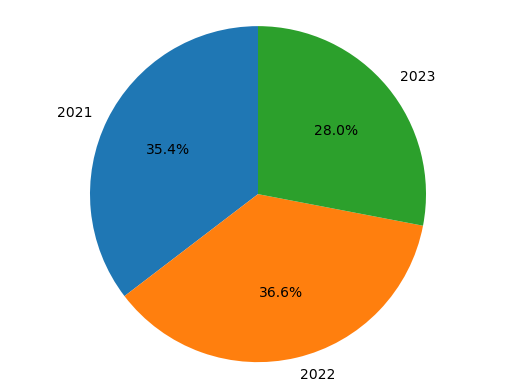

In [30]:
#NeedState1 Factory POS Composition

plt.pie(NeedState1_ByYear['factory_1'], labels=NeedState1_ByYear['Fiscal Year'], autopct='%1.1f%%', startangle=90)
plt.axis('equal') #Make sure that the chart is a circle
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

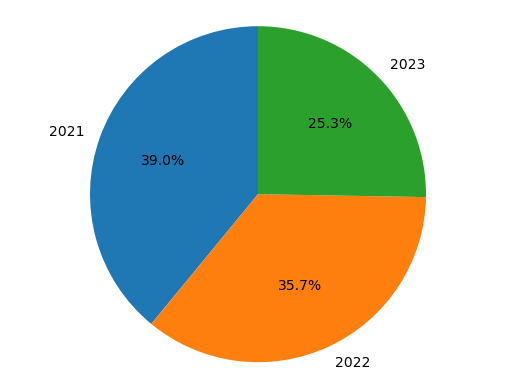

In [31]:
#NeedState1 Ecomm POS Composition

plt.pie(NeedState1_ByYear['ecomm_1'], labels=NeedState1_ByYear['Fiscal Year'], autopct='%1.1f%%', startangle=90)
plt.axis('equal') #Make sure that the chart is a circle
plt.show

In [32]:
#Filter customer inventory by inventory amount at Distribution center level and Store level

df_Dc_Amount = df_customer_inventory[['Fiscal Year','Fiscal Week','Quarter','Need States','Dc Amount']]
df_store = df_customer_inventory[['Fiscal Year','Fiscal Week','Quarter','Need States','Store Amt On Hand']]

In [33]:
# Calculate the total level of inventory at distribution center level by Quarter in each year

df_Dc_Amount = pd.pivot(df_Dc_Amount, index=['Fiscal Year','Fiscal Week','Quarter'],
                       columns=['Need States'], values='Dc Amount')
df_Dc_Amount = df_Dc_Amount.reset_index()
df_Dc_Amount = df_Dc_Amount.rename_axis(None, axis=1)
df_Dc_Amount = df_Dc_Amount
df_Dc_Amount = df_Dc_Amount.groupby(['Fiscal Year','Quarter'])[['Need State 1','Need State 2',
                                                               'Need State 3', 'Need State 4', 
                                                                'Need State 5']].sum().reset_index()
df_Dc_Amount = df_Dc_Amount.rename(columns={df_Dc_Amount.columns[2]: 'Dc_1', df_Dc_Amount.columns[3]: 'Dc_2',
                                           df_Dc_Amount.columns[4]: 'Dc_3', df_Dc_Amount.columns[5]: 'Dc_4',
                                           df_Dc_Amount.columns[6]: 'Dc_5'})

df_Dc_Amount

,Fiscal Year,Quarter,Dc_1,Dc_2,Dc_3,Dc_4,Dc_5
0,2021,Q1,28858690.50,24861400.50,21975520.50,15277007.25,9739815.75
1,2021,Q2,49624839.00,15192108.00,19061037.00,11687163.00,18720959.25
2,2021,Q3,28305152.25,14231100.75,18644627.25,11275662.00,6367692.00
3,2021,Q4,24998891.25,13378861.50,14649255.75,13419477.75,2815973.25
4,2022,Q1,31339293.75,9193075.50,15854604.00,11747549.25,5582238.00
5,2022,Q2,60932831.25,10387311.00,19390929.00,9970209.75,23778687.75
6,2022,Q3,43411633.50,17707856.25,26314710.75,10603785.00,7397405.25
7,2022,Q4,42022355.25,14540682.75,22337409.00,11643804.00,5484522.00
8,2023,Q1,35744008.50,14521305.00,22384634.25,11091411.75,11659218.00
9,2023,Q2,47224357.50,12841500.75,18905370.75,9770629.50,36425121.75


In [34]:
# Calculate the total level of inventory at store level by Quarter in each year

df_store= pd.pivot(df_store, index=['Fiscal Year','Fiscal Week','Quarter'],
                       columns=['Need States'], values='Store Amt On Hand')
df_store = df_store.reset_index()
df_store = df_store.rename_axis(None, axis=1)
df_store = df_store.groupby(['Fiscal Year','Quarter'])[['Need State 1','Need State 2',
                                                        'Need State 3', 'Need State 4', 
                                                        'Need State 5']].sum().reset_index()
df_store = df_store.rename(columns={df_store.columns[2]: 'Store_1', df_store.columns[3]: 'Store_2',
                                    df_store.columns[4]: 'Store_3', df_store.columns[5]: 'Store_4', 
                                    df_store.columns[6]: 'Store_5'})
df_store

,Fiscal Year,Quarter,Store_1,Store_2,Store_3,Store_4,Store_5
0,2021,Q1,48079431.75,36448375.50,52327328.25,25135728.00,15543367.50
1,2021,Q2,68516211.00,32258965.50,50856135.00,24486851.25,35729085.75
2,2021,Q3,58386414.75,33432778.50,54292418.25,26660217.75,20460351.00
3,2021,Q4,52006309.50,41043987.75,53256560.25,27991188.00,11464074.00
4,2022,Q1,53166899.25,33092462.25,49160526.00,26050332.75,10863518.25
5,2022,Q2,69276597.75,32270127.75,49839254.25,23056896.75,25820640.00
6,2022,Q3,68773509.75,33519008.25,55773969.00,23734956.75,17933010.00
7,2022,Q4,62106728.25,43543284.75,56125023.75,26882696.25,12403757.25
8,2023,Q1,68558498.25,37677555.00,52695045.00,26742931.50,12593547.00
9,2023,Q2,80460664.50,41324647.50,53755147.50,24932875.50,39311574.75


In [35]:
# Filter total sales from 2021 to 2023 and calculate Cost of good sold
# Assuming operating margin = 0.57
df_TS = df_master[['Fiscal Year', 'Quarter', 'Sale_1', 'Sale_2', 'Sale_3','Sale_4','Sale_5']]
df_TS = df_TS.groupby(['Fiscal Year', 'Quarter'])[['Sale_1', 'Sale_2', 'Sale_3','Sale_4','Sale_5']].sum().reset_index()
df_TS['COGS_1'] = df_TS['Sale_1'] * (1-0.57)
df_TS['COGS_2'] = df_TS['Sale_2'] * (1-0.57)
df_TS['COGS_3'] = df_TS['Sale_3'] * (1-0.57)
df_TS['COGS_4'] = df_TS['Sale_4'] * (1-0.57)
df_TS['COGS_5'] = df_TS['Sale_5'] * (1-0.57)

df_TS

,Fiscal Year,Quarter,Sale_1,Sale_2,Sale_3,Sale_4,Sale_5,COGS_1,COGS_2,COGS_3,COGS_4,COGS_5
0,2021,Q1,9587415.75,4866550.50,5115246.75,5671257.00,6092026.50,4.122589e+06,2.092617e+06,2.199556e+06,2.438641e+06,2.619571e+06
1,2021,Q2,8499171.00,4731356.25,5498836.50,5219115.00,7902006.75,3.654644e+06,2.034483e+06,2.364500e+06,2.244219e+06,3.397863e+06
2,2021,Q3,7288399.50,5066989.50,4701560.25,5836199.25,7479540.75,3.134012e+06,2.178805e+06,2.021671e+06,2.509566e+06,3.216203e+06
3,2021,Q4,4365009.00,4903787.25,3785368.50,5541228.75,5511990.75,1.876954e+06,2.108629e+06,1.627708e+06,2.382728e+06,2.370156e+06
4,2022,Q1,9397800.00,4102264.50,4506237.75,5198001.00,6628129.50,4.041054e+06,1.763974e+06,1.937682e+06,2.235140e+06,2.850096e+06
5,2022,Q2,9412632.75,5109297.00,5240413.50,4866287.25,8436606.75,4.047432e+06,2.196998e+06,2.253378e+06,2.092504e+06,3.627741e+06
6,2022,Q3,7067613.75,5914222.50,5349341.25,5837455.50,7910341.50,3.039074e+06,2.543116e+06,2.300217e+06,2.510106e+06,3.401447e+06
7,2022,Q4,5368943.25,5688537.75,4087307.25,5924579.25,6793714.50,2.308646e+06,2.446071e+06,1.757542e+06,2.547569e+06,2.921297e+06
8,2023,Q1,6837707.25,5357076.00,3799672.50,5298235.50,7339703.25,2.940214e+06,2.303543e+06,1.633859e+06,2.278241e+06,3.156072e+06
9,2023,Q2,8905632.75,4942870.50,4536291.75,4986486.75,7515980.25,3.829422e+06,2.125434e+06,1.950605e+06,2.144189e+06,3.231872e+06


In [36]:
# Merge Total Sale, Cost of good sold with Inventory at Distribution center and Store level

Dc_inventory_day = df_Dc_Amount.merge(df_TS, on=['Fiscal Year', 'Quarter'], how='inner')
Store_inventory_day = df_store.merge(df_TS, on=['Fiscal Year', 'Quarter'], how='inner')

In [37]:
# Add Inventory Day column for each need state

Dc_inventory_day ['Inventory Day 1'] = (Dc_inventory_day['Dc_1'] / Dc_inventory_day['COGS_1'] ) * 365
Dc_inventory_day ['Inventory Day 2'] = (Dc_inventory_day['Dc_2'] /  Dc_inventory_day['COGS_2']) * 365
Dc_inventory_day ['Inventory Day 3'] = (Dc_inventory_day['Dc_3'] /  Dc_inventory_day['COGS_3']) * 365
Dc_inventory_day ['Inventory Day 4'] = (Dc_inventory_day['Dc_4'] / Dc_inventory_day['COGS_4']) * 365
Dc_inventory_day ['Inventory Day 5'] = (Dc_inventory_day['Dc_5'] / Dc_inventory_day['COGS_5']) * 365

Dc_inventory_day = Dc_inventory_day[['Fiscal Year','Quarter','Inventory Day 1','Inventory Day 2','Inventory Day 3',
                                          'Inventory Day 4', 'Inventory Day 5']]

Dc_inventory_day

,Fiscal Year,Quarter,Inventory Day 1,Inventory Day 2,Inventory Day 3,Inventory Day 4,Inventory Day 5
0,2021,Q1,2555.050386,4336.394294,3646.674424,2286.564019,1357.104737
1,2021,Q2,4956.178650,2725.566598,2942.389259,1900.800964,2011.014076
2,2021,Q3,3296.535329,2384.036487,3366.170488,1639.971676,722.655854
3,2021,Q4,4861.384956,2315.858107,3284.973014,2055.672588,433.655095
4,2022,Q1,2830.658095,1902.223650,2986.521919,1918.383033,714.894198
5,2022,Q2,5494.961485,1725.704355,3140.924291,1739.125659,2392.458905
6,2022,Q3,5213.840362,2541.515353,4175.636699,1541.919637,793.795417
7,2022,Q4,6643.791357,2169.744337,4638.952435,1668.252491,685.260817
8,2023,Q1,4437.283334,2300.923864,5000.670576,1776.969521,1348.389401
9,2023,Q2,4501.172792,2205.265879,3537.599218,1663.229904,4113.767954


In [38]:
# Filter Distribution Center inventory day by Quarter

Q1_Dc = Dc_inventory_day[(Store_inventory_day['Quarter'] == 'Q1')]
Q2_Dc = Dc_inventory_day[(Store_inventory_day['Quarter'] == 'Q2')]
Q3_Dc = Dc_inventory_day[(Store_inventory_day['Quarter'] == 'Q3')]
Q4_Dc = Dc_inventory_day[(Store_inventory_day['Quarter'] == 'Q4')]

In [39]:
# Drop Quarter colum to melt Data frame fromw wide to long for the line chart

Q1_Dc = Q1_Dc.drop('Quarter', axis=1).melt(id_vars='Fiscal Year', var_name = 'Inventory day', value_name = 'Value')
Q2_Dc = Q2_Dc.drop('Quarter', axis=1).melt(id_vars='Fiscal Year', var_name = 'Inventory day', value_name = 'Value')
Q3_Dc = Q3_Dc.drop('Quarter', axis=1).melt(id_vars='Fiscal Year', var_name = 'Inventory day', value_name = 'Value')
Q4_Dc = Q4_Dc.drop('Quarter', axis=1).melt(id_vars='Fiscal Year', var_name = 'Inventory day', value_name = 'Value')

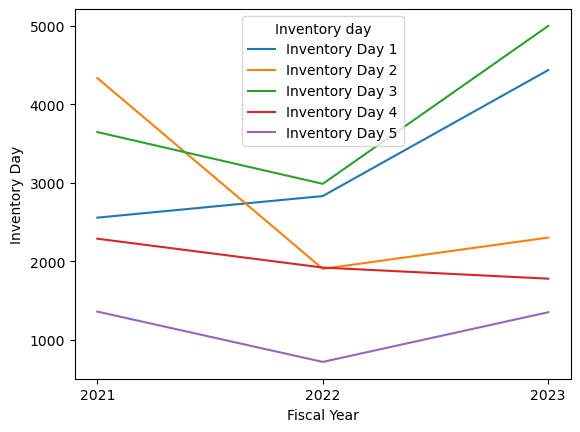

In [40]:
# Create a line Chart for Distribution center inventory day in Q1 from 2021-2023

sns.lineplot(x='Fiscal Year', y='Value', hue='Inventory day', data=Q1_Dc)
plt.xlabel('Fiscal Year')
plt.ylabel('Inventory Day')

#Set x-axis to display only unique values
unique_year = Q1_Dc['Fiscal Year'].unique()
plt.xticks(unique_year)
plt.show()

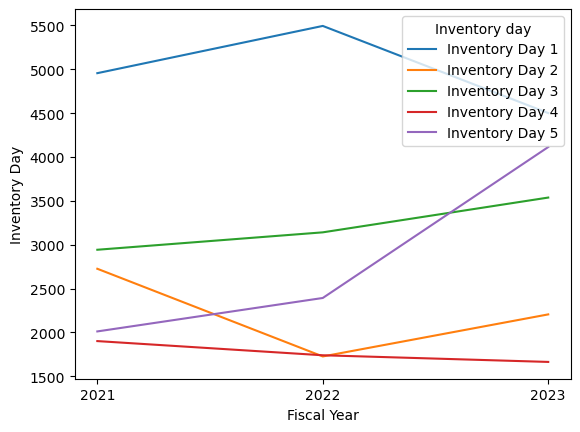

In [41]:
# Create a line Chart for Distribution center inventory day in Q2 from 2021-2023

sns.lineplot(x='Fiscal Year', y='Value', hue='Inventory day', data=Q2_Dc)
plt.xlabel('Fiscal Year')
plt.ylabel('Inventory Day')

#Set x-axis to display only unique values
unique_year = Q2_Dc['Fiscal Year'].unique()
plt.xticks(unique_year)
plt.show()

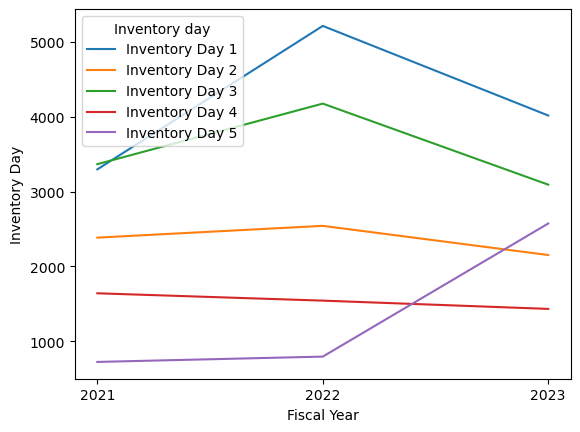

In [42]:
# Create a line Chart for Distribution center inventory day in Q3 from 2021-2023

sns.lineplot(x='Fiscal Year', y='Value', hue='Inventory day', data=Q3_Dc)
plt.xlabel('Fiscal Year')
plt.ylabel('Inventory Day')

#Set x-axis to display only unique values
unique_year = Q3_Dc['Fiscal Year'].unique()
plt.xticks(unique_year)
plt.show()

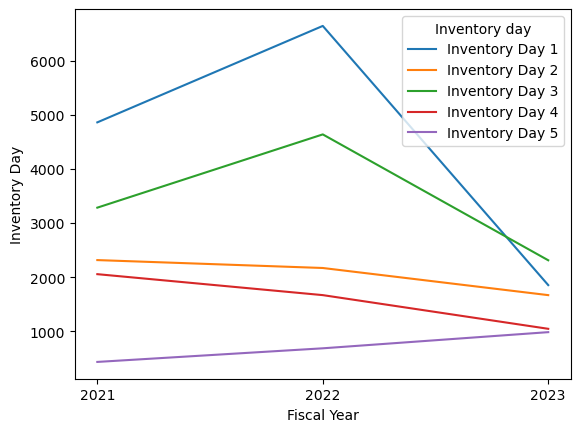

In [43]:
# Create a line Chart for Distribution center inventory day in Q4 from 2021-2023

sns.lineplot(x='Fiscal Year', y='Value', hue='Inventory day', data=Q4_Dc)
plt.xlabel('Fiscal Year')
plt.ylabel('Inventory Day')

#Set x-axis to display only unique values
unique_year = Q4_Dc['Fiscal Year'].unique()
plt.xticks(unique_year)
plt.show()

In [44]:
#Calculate Inventory day at Store level

Store_inventory_day ['Inventory Day 1'] = Store_inventory_day['Store_1'] / Store_inventory_day['Sale_1'] *365
Store_inventory_day ['Inventory Day 2'] = Store_inventory_day['Store_2'] / Store_inventory_day['Sale_2'] *365
Store_inventory_day ['Inventory Day 3'] = Store_inventory_day['Store_3'] / Store_inventory_day['Sale_3'] *365
Store_inventory_day ['Inventory Day 4'] = Store_inventory_day['Store_4'] / Store_inventory_day['Sale_4'] *365
Store_inventory_day ['Inventory Day 5'] = Store_inventory_day['Store_5'] / Store_inventory_day['Sale_5'] *365

Store_inventory_day = Store_inventory_day[['Fiscal Year','Quarter',
                                           'Inventory Day 1','Inventory Day 2','Inventory Day 3',
                                          'Inventory Day 4', 'Inventory Day 5']]
Store_inventory_day

,Fiscal Year,Quarter,Inventory Day 1,Inventory Day 2,Inventory Day 3,Inventory Day 4,Inventory Day 5
0,2021,Q1,1830.419484,2733.693415,3733.832549,1617.726144,931.271251
1,2021,Q2,2942.453683,2488.614635,3375.712167,1712.493537,1650.354994
2,2021,Q3,2923.967242,2408.326315,4214.926877,1667.348742,998.460783
3,2021,Q4,4348.743145,3054.997039,5135.205328,1843.775827,759.142604
4,2022,Q1,2064.942670,2944.410026,3981.945247,1829.236172,598.235771
5,2022,Q2,2686.385292,2305.326277,3471.353511,1729.402084,1117.100024
6,2022,Q3,3551.740651,2068.646895,3805.608529,1484.081414,827.467265
7,2022,Q4,4222.237926,2793.916404,5012.012167,1656.182442,666.405896
8,2023,Q1,3659.684591,2567.129452,5061.934002,1842.343550,626.271185
9,2023,Q2,3297.704202,3051.566157,4325.257263,1825.032335,1909.095595


In [45]:
# Filter Store inventory by Quater

Q1_store = Store_inventory_day[(Store_inventory_day['Quarter'] == 'Q1')]
Q2_store = Store_inventory_day[(Store_inventory_day['Quarter'] == 'Q2')]
Q3_store = Store_inventory_day[(Store_inventory_day['Quarter'] == 'Q3')]
Q4_store = Store_inventory_day[(Store_inventory_day['Quarter'] == 'Q4')]

In [46]:
# Drop Quarter colum to melt Data frame fromw wide to long for the line chart

Q1_store = Q1_store.drop('Quarter', axis=1).melt(id_vars='Fiscal Year', var_name = 'Inventory day', value_name = 'Value')
Q2_store = Q2_store.drop('Quarter', axis=1).melt(id_vars='Fiscal Year', var_name = 'Inventory day', value_name = 'Value')
Q3_store = Q3_store.drop('Quarter', axis=1).melt(id_vars='Fiscal Year', var_name = 'Inventory day', value_name = 'Value')
Q4_store = Q4_store.drop('Quarter', axis=1).melt(id_vars='Fiscal Year', var_name = 'Inventory day', value_name = 'Value')

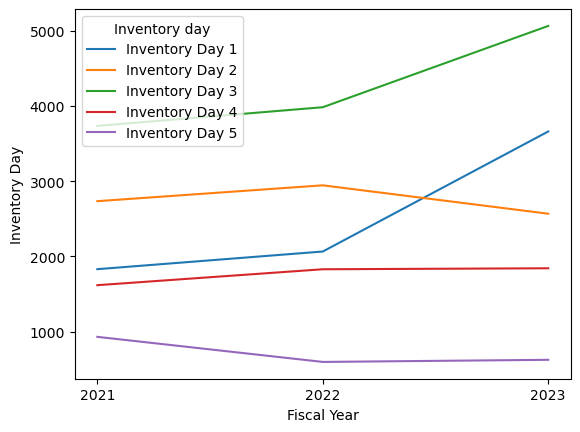

In [47]:
# Create a line Chart for Store inventory day in Q1 from 2021-2023

sns.lineplot(x='Fiscal Year', y='Value', hue='Inventory day', data=Q1_store)
plt.xlabel('Fiscal Year')
plt.ylabel('Inventory Day')

#Set x-axis to display only unique values
unique_year = Q1_store['Fiscal Year'].unique()
plt.xticks(unique_year)
plt.show()

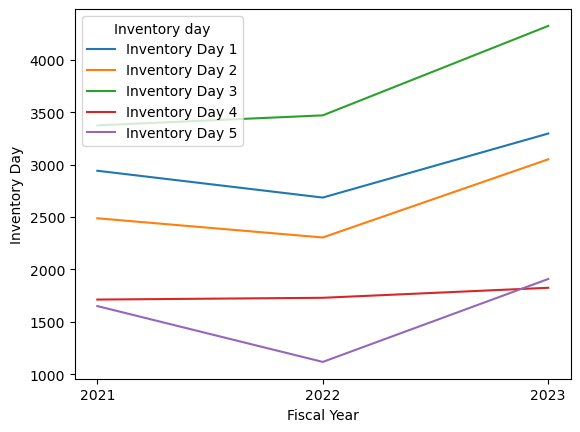

In [48]:
# Create a line Chart for Store inventory day in Q2 from 2021-2023

sns.lineplot(x='Fiscal Year', y='Value', hue='Inventory day', data=Q2_store)
plt.xlabel('Fiscal Year')
plt.ylabel('Inventory Day')

#Set x-axis to display only unique values
unique_year = Q2_store['Fiscal Year'].unique()
plt.xticks(unique_year)
plt.show()

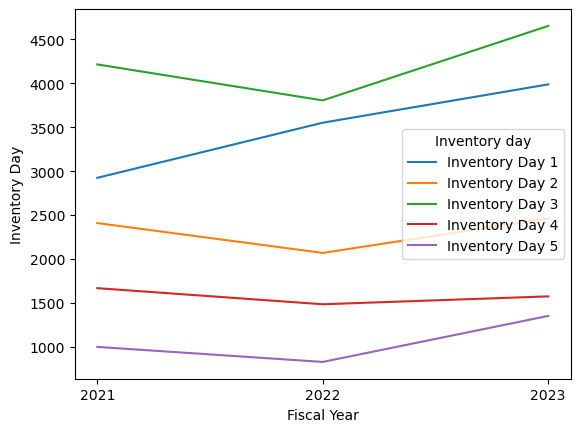

In [49]:
# Create a line Chart for Store inventory day in Q3 from 2021-2023

sns.lineplot(x='Fiscal Year', y='Value', hue='Inventory day', data=Q3_store)
plt.xlabel('Fiscal Year')
plt.ylabel('Inventory Day')

#Set x-axis to display only unique values
unique_year = Q1_store['Fiscal Year'].unique()
plt.xticks(unique_year)
plt.show()

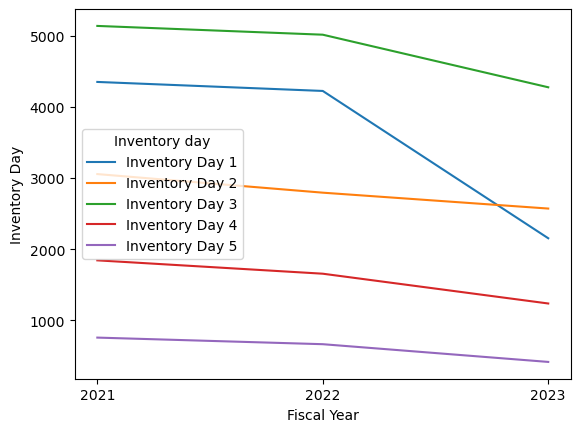

In [50]:
# Create a line Chart for Store inventory day in Q4 from 2021-2023

sns.lineplot(x='Fiscal Year', y='Value', hue='Inventory day', data=Q4_store)
plt.xlabel('Fiscal Year')
plt.ylabel('Inventory Day')

#Set x-axis to display only unique values
unique_year = Q1_store['Fiscal Year'].unique()
plt.xticks(unique_year)
plt.show()

In [51]:
# Check df_master for na value in Sale columns for need state 1 to 5

df_master[df_master[['Sale_1', 'Sale_2', 'Sale_3','Sale_4','Sale_5']].isna().all(axis=1)]

# Drop the last two line of df_master due to lack of information for need state total sales
df_lrp = df_master[:-2]

In [52]:
# Create a linear regression with 
# Need State 1 total sale = Independent Value, Need State 1 trade spending = Dependent Value

X = df_lrp[['Sale_1']]
Y = df_lrp[['Trade_1']]

Sale_trade_model = LinearRegression()

Sale_trade_model.fit(X,Y)

print(Sale_trade_model.score(X,Y))

0.0003333570507340067
